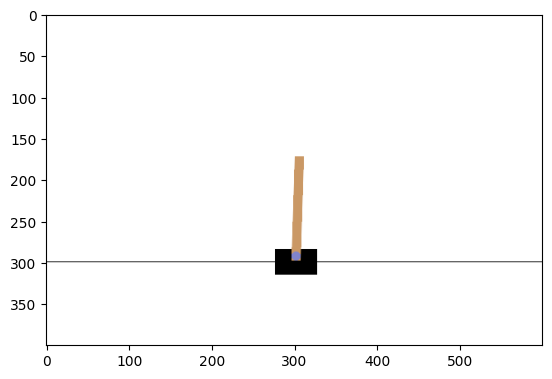

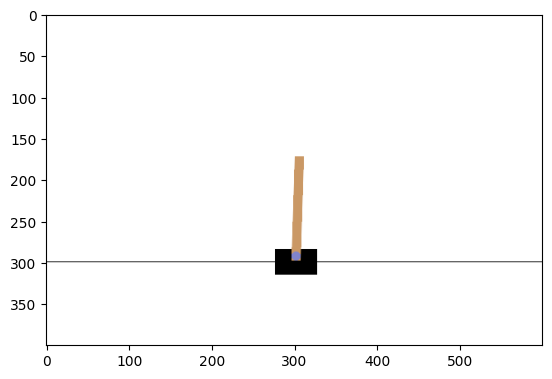

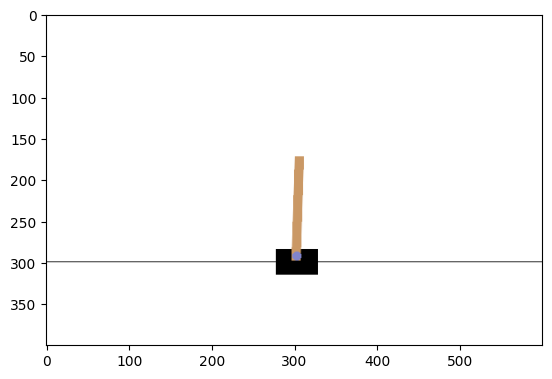

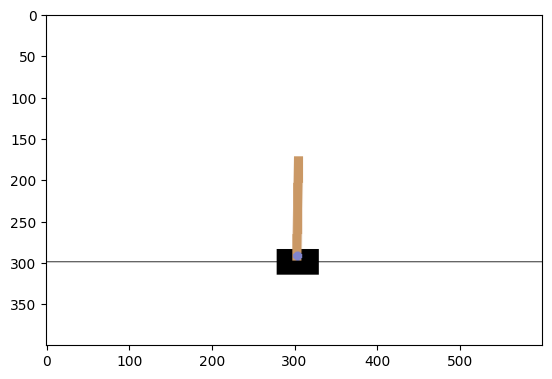

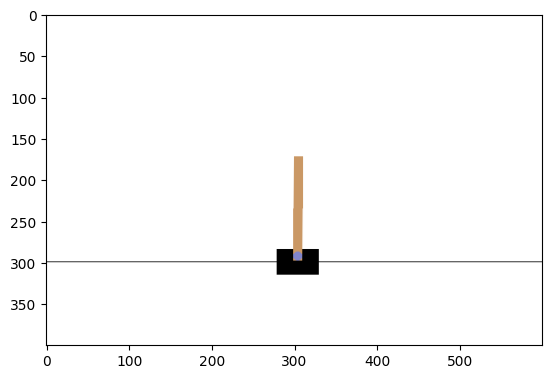

In [3]:
import gym
import matplotlib.pyplot as plt

n=5 # Number of images to capture
env = gym.make('CartPole-v1')
env.reset()
images=[]
for _ in range(n):  
    image=env.render(mode='rgb_array')
    plt.imshow(image)
    images.append(image)
    plt.show()  
    action = env.action_space.sample()  # Take a random action
    env.step(action)
env.close()

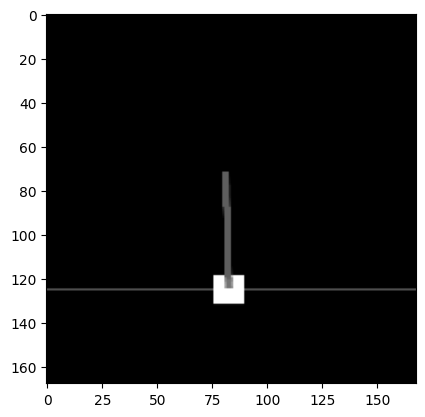

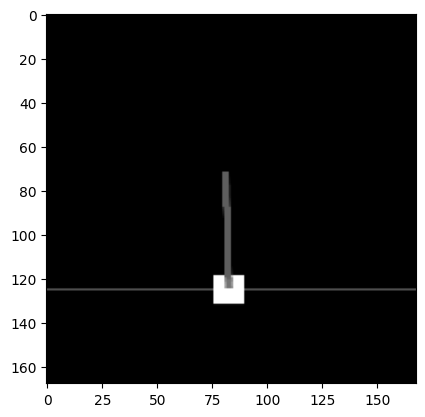

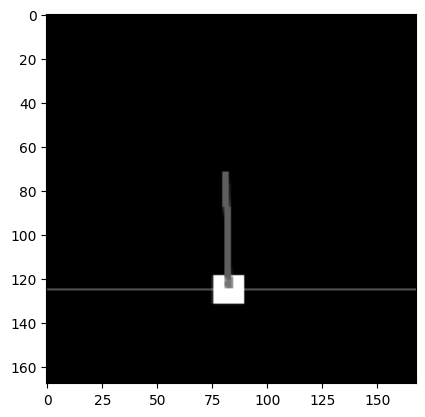

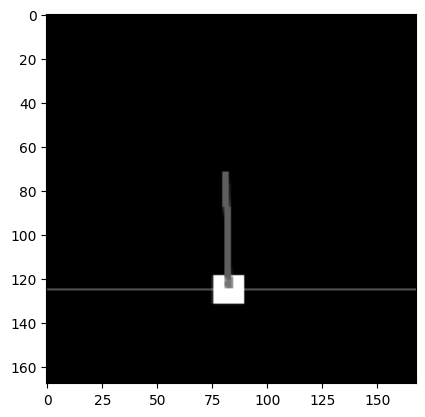

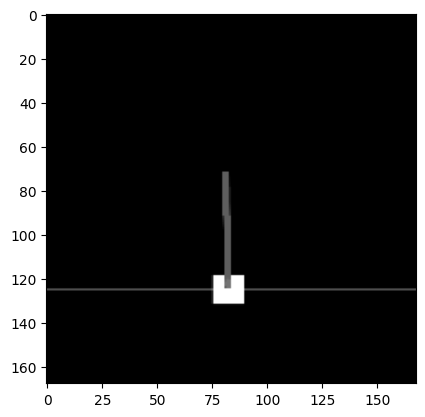

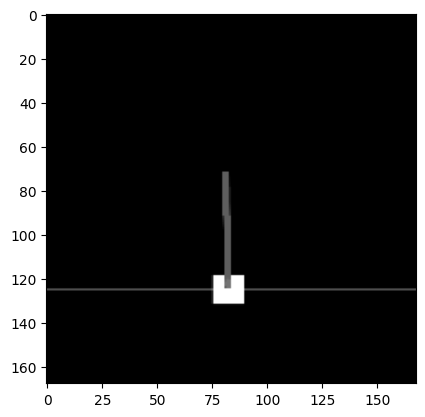

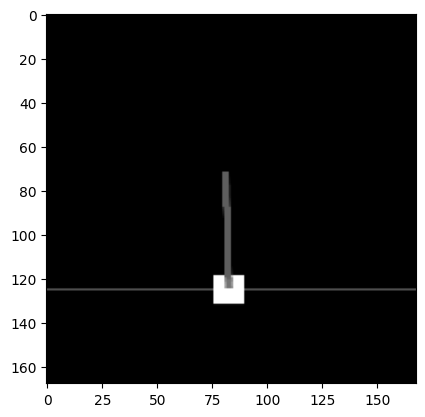

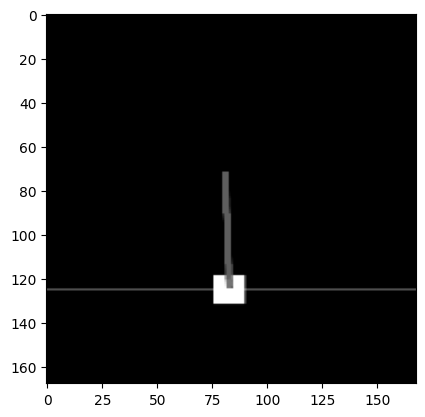

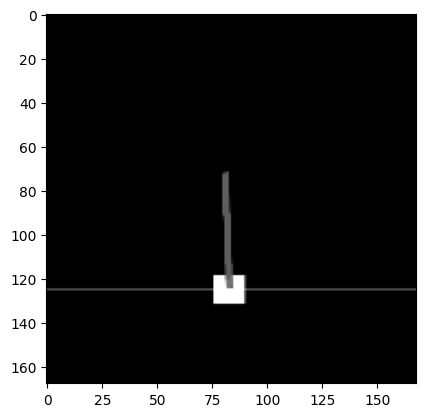

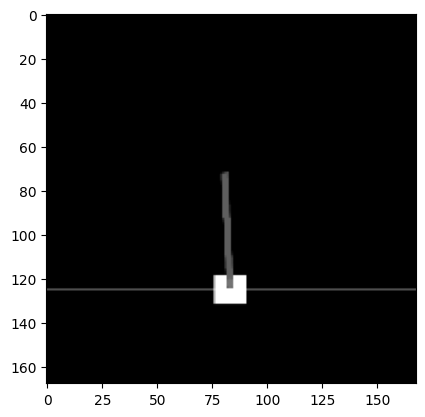

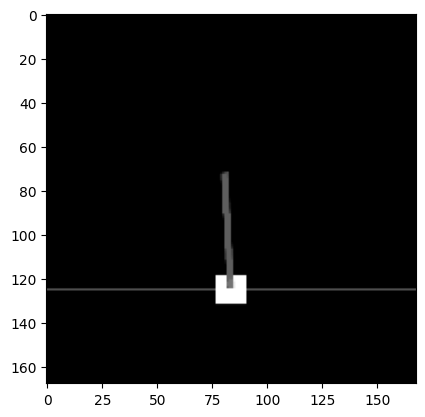

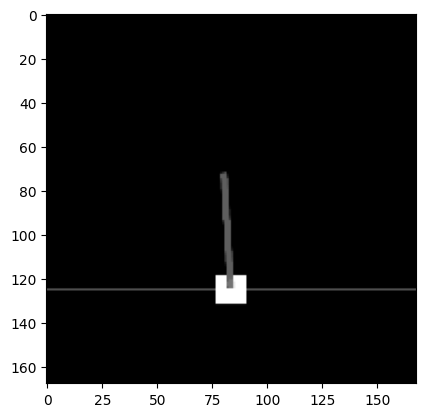

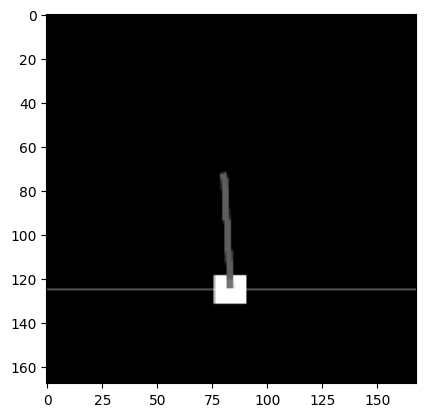

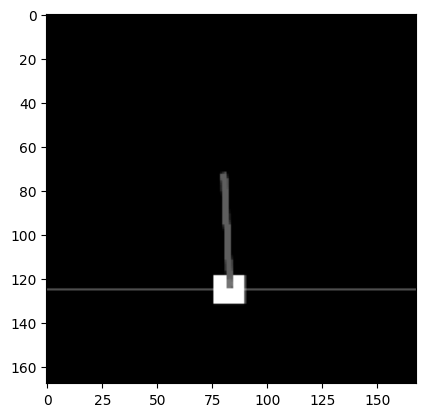

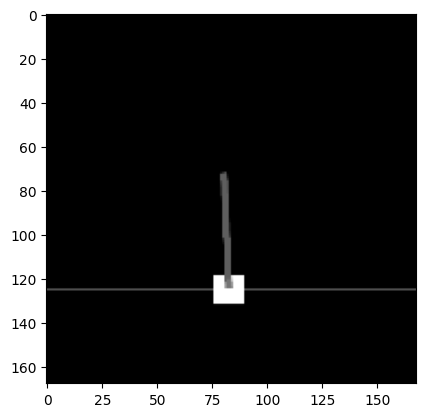

In [7]:
import cv2
import numpy as np

def preprocess_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    resized_image = cv2.resize(gray_image, (168, 168))  # Resize to 84x84
    normalized_image = resized_image / 255.0  # Normalize to [0, 1]
    return normalized_image

preprocessed_images = np.array([preprocess_image(img) for img in images])

import os

cmap = plt.cm.binary
save_dir = 'outputs/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for i,img in enumerate(preprocessed_images):
    plt.figure()
    name = save_dir+f'preprocess{i}_'+str(img.shape)
    data = img*255
    plt.imshow(data, cmap=cmap)
    plt.imsave(name+'.png', data, cmap=cmap)
    
stacked_images = np.stack(preprocessed_images, axis=0)